<a href="https://colab.research.google.com/github/FatiMirhakak/Dashboard/blob/main/Course8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install folium
!pip install pywaffle
!pip install dash pandas plotly



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.4 MB/s eta 0:00:00


In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from pywaffle import Waffle
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Mapping
import folium
import json
import requests

# Dashboard
import dash
from dash import Dash, dcc, html, Input, Output
import base64
import io

In [ ]:
# check for latest version of Matplotlib and seaborn
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Seaborn version: ', sns.__version__)


Matplotlib version:  3.10.0
Seaborn version:  0.13.2


In [ ]:
import aiohttp
import asyncio

async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, 'wb') as f:
                    f.write(await response.read())


In [ ]:
file_path="https://raw.githubusercontent.com/datagy/data/main/Unemployment_Canada_1976_present.csv"

In [ ]:
# Run the async function
await download(file_path, "file.csv")
file_name="auto.csv"

In [ ]:
# Read into a DataFrame

df_can = pd.read_csv("file.csv")

# View the DataFrame
df_can.head()

,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
0,1976-01,Alberta,Both sexes,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1
1,1976-01,Alberta,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
2,1976-01,Alberta,Both sexes,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3
3,1976-01,Alberta,Both sexes,25 to 54 years,491400.0,439800.0,505800.0,51600.0,661700.0,14400.0,74.3,76.4,2.8
4,1976-01,Alberta,Both sexes,25 years and over,587700.0,518800.0,604200.0,68900.0,914400.0,16500.0,64.3,66.1,2.7


In [ ]:
df_can.tail()

,REF_DATE,GEO,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
38980,2023-01,Saskatchewan,Both sexes,15 to 64 years,553900.0,458100.0,579800.0,95800.0,719100.0,25900.0,77.0,80.6,4.5
38981,2023-01,Saskatchewan,Both sexes,15 years and over,589000.0,479000.0,615500.0,110000.0,912000.0,26500.0,64.6,67.5,4.3
38982,2023-01,Saskatchewan,Both sexes,25 to 54 years,379900.0,337300.0,394500.0,42600.0,442400.0,14600.0,85.9,89.2,3.7
38983,2023-01,Saskatchewan,Both sexes,25 years and over,507400.0,436000.0,526200.0,71500.0,774200.0,18700.0,65.5,68.0,3.6
38984,2023-01,Saskatchewan,Both sexes,55 years and over,127500.0,98700.0,131600.0,28800.0,331800.0,4100.0,38.4,39.7,3.1


In [ ]:
print('data dimensions:', df_can.shape)

data dimensions: (38985, 13)


In [ ]:
df_can = df_can[df_can['GEO'] != 'Canada']
print('data dimensions:', df_can.shape)

data dimensions: (33900, 13)


In [ ]:
df_can.set_index('GEO', inplace=True)
df_can.reset_index(inplace=True)
print('data dimensions:', df_can.shape)

data dimensions: (33900, 13)


In [ ]:
df_can.head(3)

,GEO,REF_DATE,Sex,Age group,Employment,Full-time employment,Labour force,Part-time employment,Population,Unemployment,Employment rate,Participation rate,Unemployment rate
0,Alberta,1976-01,Both sexes,15 to 24 years,231800.0,174900.0,252300.0,56900.0,362300.0,20500.0,64.0,69.6,8.1
1,Alberta,1976-01,Both sexes,15 to 64 years,802400.0,682100.0,837500.0,120300.0,1154800.0,35000.0,69.5,72.5,4.2
2,Alberta,1976-01,Both sexes,15 years and over,819500.0,693700.0,856500.0,125800.0,1276700.0,37000.0,64.2,67.1,4.3


In [ ]:
print(df_can.columns.tolist())

['GEO', 'REF_DATE', 'Sex', 'Age group', 'Employment', 'Full-time employment', 'Labour force', 'Part-time employment ', 'Population', 'Unemployment', 'Employment rate', 'Participation rate', 'Unemployment rate']


In [ ]:
# Step 1: Filter and preprocess the data
# ==========================================
# Filter data for both sexes and age 25-54, drop national data
filtered_df = df_can[
    (df_can['Sex'] == 'Both sexes') &
    (df_can['Age group'] == '25 to 54 years')
]
# Drop missing values in 'Unemployment'
filtered_df = filtered_df.dropna(subset=['Unemployment'])

# Convert REF_DATE to datetime
filtered_df['REF_DATE'] = pd.to_datetime(filtered_df['REF_DATE'], format='%Y-%m')


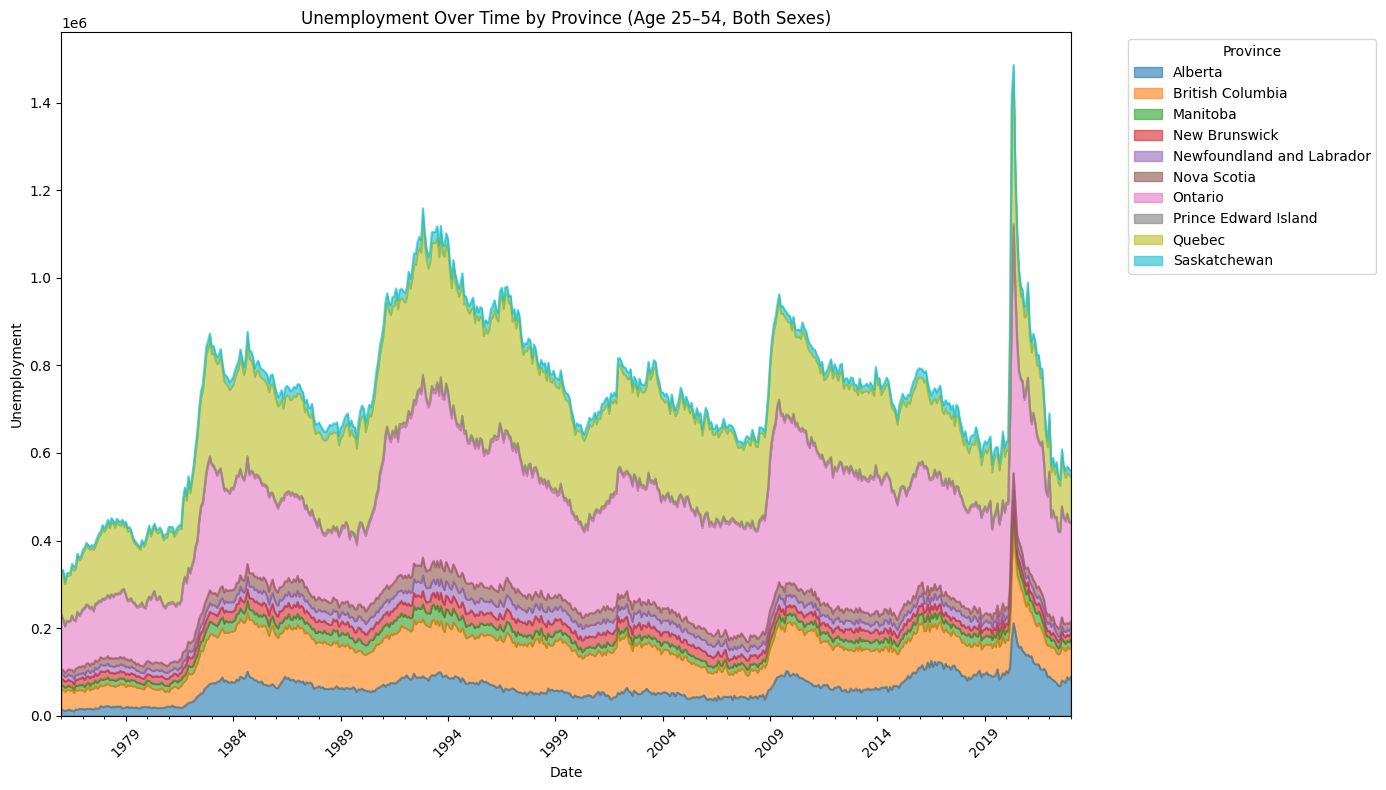

In [ ]:
#Area chart:
# Pivot the DataFrame: rows are dates, columns are provinces, values are unemployment
pivot_df = filtered_df.pivot(index='REF_DATE', columns='GEO', values='Unemployment')

#alpha=0.6 controls the transparency so overlapping areas can be seen more clearly
# Plot the area chart
pivot_df.plot(kind='area', figsize=(14, 8), alpha=0.6)

plt.title('Unemployment Over Time by Province (Age 25–54, Both Sexes)')
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.xticks(rotation=45)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

{'Alberta': 16, 'British Columbia': 13, 'Manitoba': 3, 'New Brunswick': 2, 'Newfoundland and Labrador': 3, 'Nova Scotia': 2, 'Ontario': 40, 'Quebec': 18, 'Saskatchewan': 3}


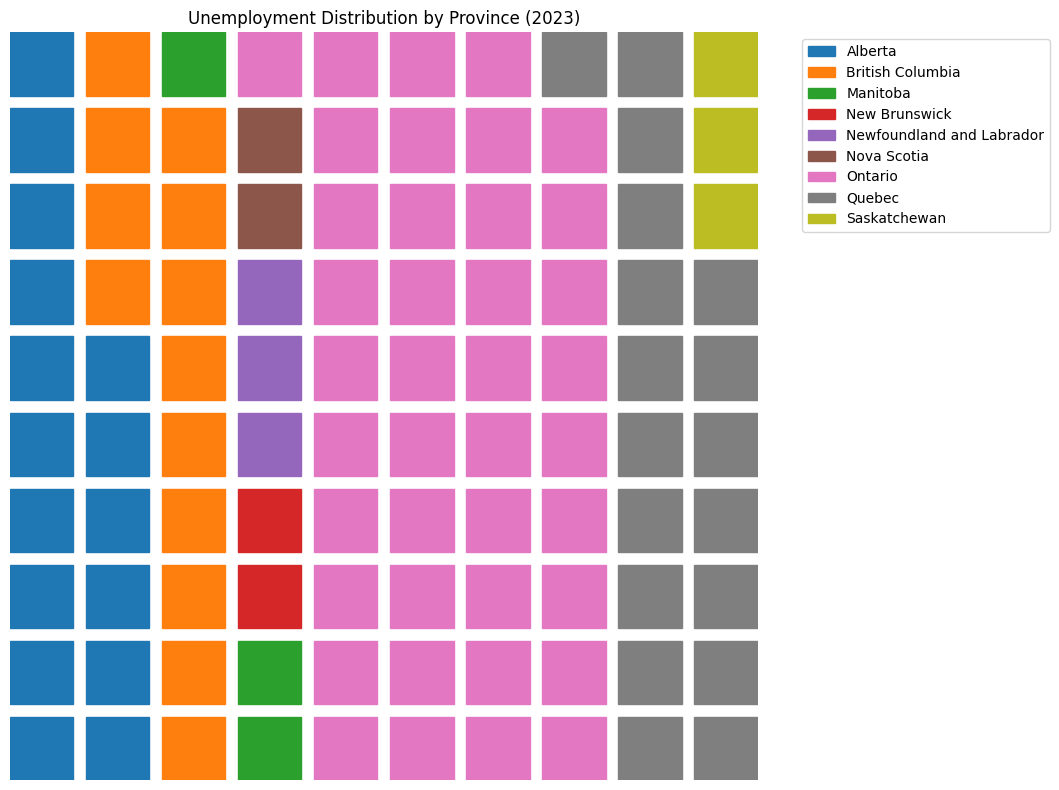

In [ ]:
#WAFFLE CHART
# Get the latest year with data
filtered_df['year'] = filtered_df['REF_DATE'].dt.year
latest_year = filtered_df['year'].max()

# Filter for the latest year
waffle_df = filtered_df[filtered_df['year'] == latest_year]

# Group by province and calculate mean unemployment rate
waffle_df = waffle_df.groupby('GEO')['Unemployment'].mean().reset_index()

# Calculate share of total
total = waffle_df['Unemployment'].sum()
waffle_df['percentage'] = (waffle_df['Unemployment'] / total * 100).round().astype(int)

# Remove provinces with 0 after rounding (optional to prevent empty chart)
waffle_df = waffle_df[waffle_df['percentage'] > 0]

# Build values dictionary
data = dict(zip(waffle_df['GEO'], waffle_df['percentage']))
print(data)  # Debug: confirm it has values

# Create Waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=sns.color_palette("tab10", n_colors=len(data)).as_hex(),
    title={'label': f'Unemployment Distribution by Province ({latest_year})', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
    figsize=(14, 8)
)

plt.tight_layout()
plt.show()

# New Section

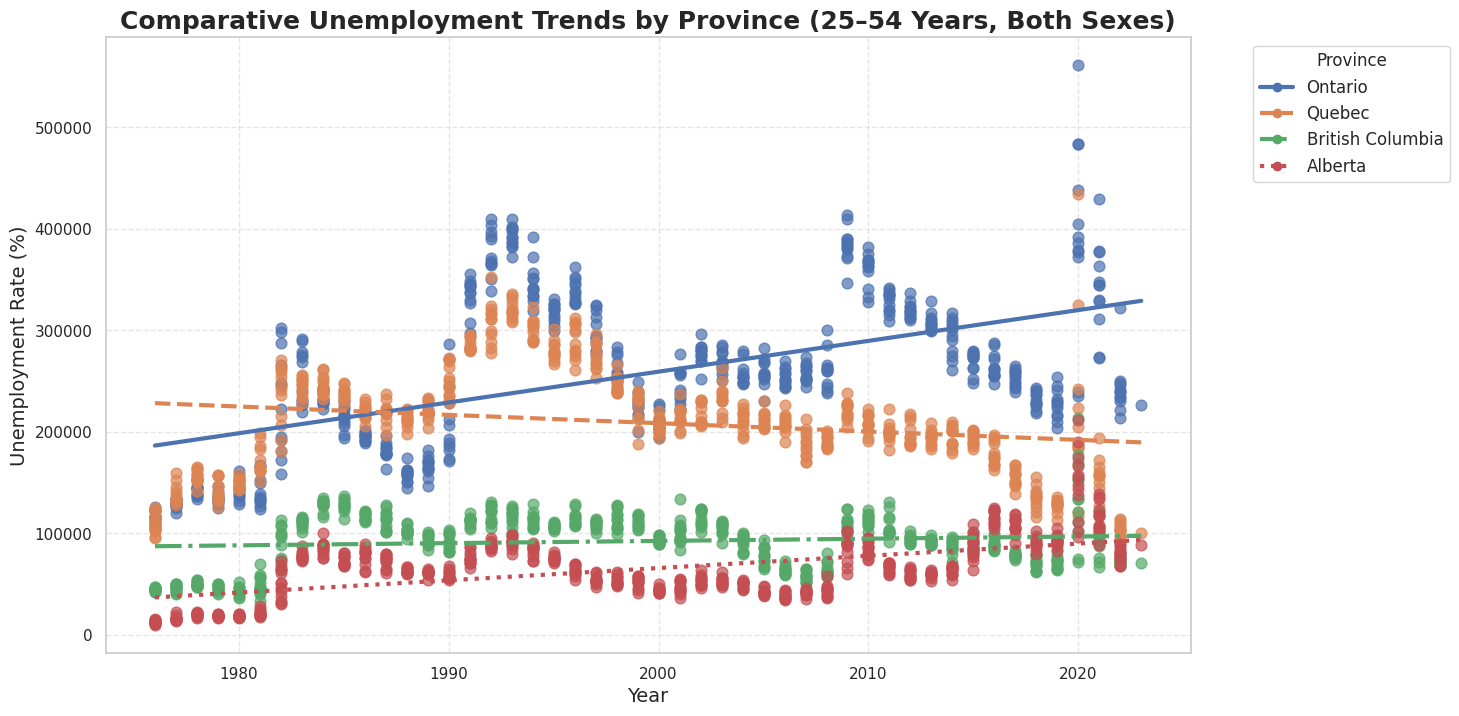

In [ ]:
#REGRESSION CHART
# Filter provinces
provinces = ['Ontario', 'Quebec', 'British Columbia', 'Alberta']
df_plot = filtered_df[filtered_df['GEO'].isin(provinces)].copy()
df_plot['year'] = df_plot['REF_DATE'].dt.year

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Use area chart colors for regression chart
colors = {
    'Ontario': '#4C72B0',          # medium blue
    'Quebec': '#DD8452',           # medium orange
    'British Columbia': '#55A868', # medium green
    'Alberta': '#C44E52'           # medium red
}

line_styles = ['-', '--', '-.', ':']

for i, province in enumerate(provinces):
    data = df_plot[df_plot['GEO'] == province].sort_values('year')

    # Scatter points
    plt.scatter(
        data['year'],
        data['Unemployment'],
        color=colors[province],
        s=60,
        alpha=0.7,
        zorder=3
    )

    # Linear regression
    coef = np.polyfit(data['year'], data['Unemployment'], 1)
    poly1d_fn = np.poly1d(coef)

    # Regression line
    plt.plot(
        data['year'],
        poly1d_fn(data['year']),
        color=colors[province],
        linestyle=line_styles[i],
        linewidth=3,
        zorder=5
    )


plt.title('Comparative Unemployment Trends by Province (25–54 Years, Both Sexes)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
legend_handles = []
for i, province in enumerate(provinces):
    handle = mlines.Line2D(
        [], [],
        color=colors[province],
        linestyle=line_styles[i],
        linewidth=3,
        marker='o',
        markersize=6,
        label=province
    )
    legend_handles.append(handle)

# Add the legend
plt.legend(
    handles=legend_handles,
    title='Province',
    fontsize=12,
    title_fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)


In [ ]:
#MAP CHART
# Get the most recent date
latest_date = filtered_df['REF_DATE'].max()
latest_data = filtered_df[filtered_df['REF_DATE'] == latest_date]

# Rename GEO to Province
latest_data = latest_data.rename(columns={'GEO': 'Province'})
latest_data['Province'] = latest_data['Province'].str.strip()

# Create a DataFrame with just Province and Unemployment rate
unemployment_by_province = latest_data[['Province', 'Unemployment rate']].copy()
unemployment_by_province.rename(columns={'Unemployment rate': 'Unemployment'}, inplace=True)

# ==========================================
#  Load GeoJSON for Canadian provinces
# ==========================================
geo_url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/canada.geojson"

try:
    response = requests.get(geo_url)
    response.raise_for_status()
    geojson = response.json()
except requests.RequestException as e:
    raise RuntimeError(f"Failed to fetch GeoJSON: {e}")

# ==========================================
# Attach unemployment data to GeoJSON properties
# ==========================================
for feature in geojson['features']:
    prov_name = feature['properties']['name'].strip()
    match = unemployment_by_province[unemployment_by_province['Province'] == prov_name]
    if not match.empty:
        feature['properties']['unemployment'] = round(float(match['Unemployment'].values[0]), 2)
    else:
        feature['properties']['unemployment'] = 'N/A'

# ==========================================
# Create the Folium map
# ==========================================
m = folium.Map(location=[56.130, -106.35], zoom_start=4)

# Choropleth layer
folium.Choropleth(
    geo_data=geojson,
    name='Unemployment Rate',
    data=unemployment_by_province,
    columns=['Province', 'Unemployment'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f'Unemployment Rate by Province ({latest_date.date()})',
    nan_fill_color='white'
).add_to(m)

# Tooltip layer
folium.GeoJson(
    geojson,
    name='Province Labels',
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'unemployment'],
        aliases=['Province:', 'Unemployment Rate (%):'],
        localize=True,
        labels=True,
        sticky=False,
        style=(
            "background-color: white; "
            "color: #333; "
            "font-family: Arial; "
            "font-size: 12px; "
            "padding: 10px;"
        )
    )
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Show the map (Jupyter Notebook) or save it
m

In [ ]:
# CREATE DASHBOARD
# Step 1: Filter and preprocess the data
# ==========================================
# Filter data for both sexes and age 25-54, drop national data
filtered_df = df_can[
    (df_can['Sex'] == 'Both sexes') &
    (df_can['Age group'] == '25 to 54 years')
]
# Drop missing values in 'Unemployment'
filtered_df = filtered_df.dropna(subset=['Unemployment'])

# Convert REF_DATE to datetime
filtered_df['REF_DATE'] = pd.to_datetime(filtered_df['REF_DATE'], format='%Y-%m')


# Reset index and convert back to DataFrame
filtered_df = filtered_df.reset_index(drop=True)
df_can = pd.DataFrame(filtered_df)


# Extract year
df_can['Year'] = df_can['REF_DATE'].dt.year
year_list = sorted(df_can['Year'].unique())

# App setup
app = Dash(__name__)
app.layout = html.Div([
    html.H1('Unemployment Rate by Province between 1976 to 2023', style={'textAlign': 'center'}),

    dcc.Dropdown(
        id='select-year',
        options=[{'label': i, 'value': i} for i in year_list],
        placeholder='Select year',
        style={'width': '50%', 'margin': '20px auto'}
    ),
    html.Div(id='output-container', style={
        'display': 'flex',
        'flexWrap': 'wrap',
        'justifyContent': 'center',
        'alignItems': 'center',
        'padding': '20px'
    })
])

@app.callback(
    Output('output-container', 'children'),
    Input('select-year', 'value')
)
def update_output_container(selected_year):
    if selected_year is None:
        return html.Div("Please select a year to view data.")

    try:
        yearly_data = df_can[df_can['Year'] == selected_year]

        # Line Chart
        chart1 = dcc.Graph(figure=px.line(
            yearly_data, x='REF_DATE', y='Unemployment', color='GEO',
            title=f"Line Chart of Unemployment Rate Over Time in {selected_year}"
        ))

        # Bar Chart
        chart2 = dcc.Graph(figure=px.bar(
            yearly_data, x='GEO', y='Unemployment', color='GEO',
            title=f"Bar Chart of Unemployment by Province in {selected_year}"
        ))

        # Area Chart
        chart3 = dcc.Graph(figure=px.area(
            yearly_data, x='GEO', y='Unemployment',
            title=f"Unemployment by Province in {selected_year}"
        ))

        # Regression Chart
        chart4 = dcc.Graph(figure=px.scatter(
            yearly_data, x='REF_DATE', y='Unemployment', color='GEO',
            trendline='ols',
            title=f"Regression Trends in {selected_year}"
        ))

        # Waffle Chart
        waffle_df = yearly_data.groupby('GEO')['Unemployment'].mean().reset_index()
        total = waffle_df['Unemployment'].sum()
        waffle_df['percentage'] = (waffle_df['Unemployment'] / total * 100).round().astype(int)
        waffle_df = waffle_df[waffle_df['percentage'] > 0]
        waffle_data = dict(zip(waffle_df['GEO'], waffle_df['percentage']))
        custom_colors = {
            'Ontario': '#4C72B0',          # medium blue
            'Quebec': '#DD8452',           # medium orange
            'British Columbia': '#55A868', # medium green
            'Alberta': '#C44E52',           # medium red
            'Manitoba': '#8172B2',
            'Saskatchewan': '#CCB974',
            'Nova Scotia': '#64B5CD',
            'New Brunswick': '#937860',
            'Newfoundland and Labrador': '#DA8BC3',
            'Prince Edward Island': '#8C564B'}

        colors = [custom_colors[province] for province in waffle_df['GEO']]
        fig = plt.figure(
            FigureClass=Waffle,
            rows=10,
            values=waffle_data,
            title={'label': f"Waffle Chart: Unemployment Share by Province in {selected_year}", 'loc': 'center','fontsize': 18},
            legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
            colors=colors,
            figsize=(9, 5)

        )
        fig.subplots_adjust(top=0.85)
        buf = io.BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight')
        plt.close(fig)
        buf.seek(0)
        encoded = base64.b64encode(buf.read()).decode('utf-8')
        chart5 = html.Img(src='data:image/png;base64,{}'.format(encoded), style={'width': '100%'})

        # Choropleth
        geo_url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/canada.geojson"
        geojson = requests.get(geo_url).json()

        map_data = yearly_data.rename(columns={'GEO': 'Province'})
        map_data['Province'] = map_data['Province'].str.strip()

        fig4 = px.choropleth(
            map_data,
            geojson=geojson,
            locations='Province',
            featureidkey='properties.name',
            color='Unemployment',
            color_continuous_scale='YlOrRd',
            scope='north america',
            title=f'Choropleth Map: Unemployment Rate by Province ({selected_year})'
        )

        fig4.update_geos(fitbounds="locations", visible=False)
        fig4.update_layout(
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        height=700,   # Increase height
        width=1000
            # Increase width
        )


        chart6 = dcc.Graph(figure=fig4)

        return html.Div([
            # First row (area chart + waffle chart)
            html.Div([
                html.Div([chart1], style={'margin': '10px', 'width': '45%'}),
                html.Div([chart2], style={'margin': '10px', 'width': '45%'})
            ], style={'display': 'flex', 'justifyContent': 'center'}),

            # Second row (regression + choropleth)
            html.Div([
                html.Div([chart3], style={'margin': '10px', 'width': '45%'}),
                html.Div([chart4], style={'margin': '10px', 'width': '45%'})
            ], style={'display': 'flex', 'justifyContent': 'center'}),

            # Third row (line + bar chart)
            html.Div([
                html.Div([chart5], style={'margin': '10px', 'width': '45%'}),
                html.Div([chart6], style={'margin': '10px', 'width': '45%'})
            ], style={'display': 'flex', 'justifyContent': 'center'})
        ])

    except Exception as e:
        return html.Div(f"Error: {str(e)}")

if __name__ == '__main__':
    app.run(debug=True, port=8051)

<IPython.core.display.Javascript object>